<a href="https://colab.research.google.com/github/VICTORIA-OKESIPE/Personal-Projects/blob/main/Nigeria_Loan_Default_Pred/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KaggleX FINAL SHOWCASE PROJECT**

![loan 2.jpg](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Rb7eG5HTSr5aC2-cqa2O0w.png)

### **PROJECT FRAMEWORK**

This notebook covers:
- Business Understanding


- Exploratory Data Analysis
  * Understanding the Data
  * Relationship Analysis between the variables
  * Cleaning the Data


- Modelling
  * Model Training
  * Model Evaluation
  * Shortlisting Promising Models
  * Predictions


- Findings & Recommendations



### **BUSINESS UNDERSTANDING**

### **The Problem**

<p align = "justify"> <br> SuperLender is a digital lending company that uses credit risk models to assess the likelihood of loan repayment by determining the customer's willingness and ability to pay. The company invests in experienced data scientists to build robust models that can accurately predict the odds of repayment. </br>

<br> To make a calculated decision on whether to grant a loan, SuperLender needs to determine the two fundamental drivers of loan default prediction, willingness to pay and ability to pay, at the point of each application. This information helps the company determine the size, price, and tenure of the loan offer. </br>

<br> There are two types of risk models used by SuperLender. The first is a new business risk model that assesses the risk of the first loan application. The second is a repeat or behavior risk model that assesses the risk of repeat loan applications by existing customers based on their prior loan repayment performance. </br>

<br> As a KaggleX Mentee, my job is to help you predict whether a loan will be good (settled on time) or bad (or not) based on a binary outcome variable. In this case, a good loan is denoted as 1 and a bad loan is denoted as 0. </br> </p>

### **The Objective**

Predict if a loan was good (= settled loan on time) or bad (= did not settled loan on time), that is, predict binary outcome variable, where good is 1 and bad is 0.

### **The Datasets**

There are 3 different datasets: Demographic Data, Performance Data, and Previous Loans Data.

### **EXPLORATORY DATA ANALYSIS - UNDERSTANDING THE DATA**

### **Importing Necessary Libraries**

In [101]:
# useful for data manipulation
import pandas as pd     # useful for data manipulation
import numpy as np      # useful for working with arrays
from sklearn import preprocessing       # useful for data standardisation

# useful for data visualisation
import seaborn as sns   # useful for data visualisation
import matplotlib.pyplot as plt  # useful for data visualisation
import plotly.express as px  # useful for high-level data visualisation

# useful for data preparation
from sklearn.preprocessing import LabelEncoder  # for data encoding
from sklearn.model_selection import train_test_split # useful for data splitting
from sklearn.model_selection import GridSearchCV # a cross-validation technique for finding the optimal parameter values from a given set of parameters in a grid

# useful for building Machine Learning Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier # a scikit-learn API compatible class for classification

# useful for Model Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import scipy.stats as stats

### **Loading Data Dictionary**

[Customer Demographic Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/demo_metadata.JPG)


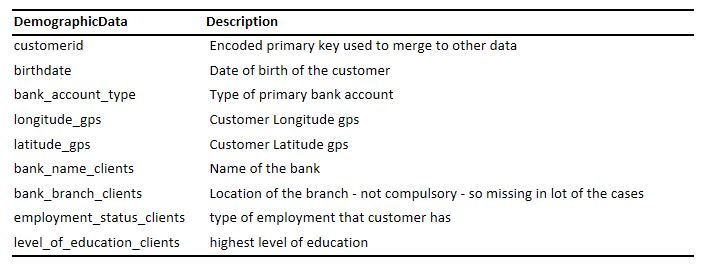

[Customer Performance Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/perf_metadata.JPG)
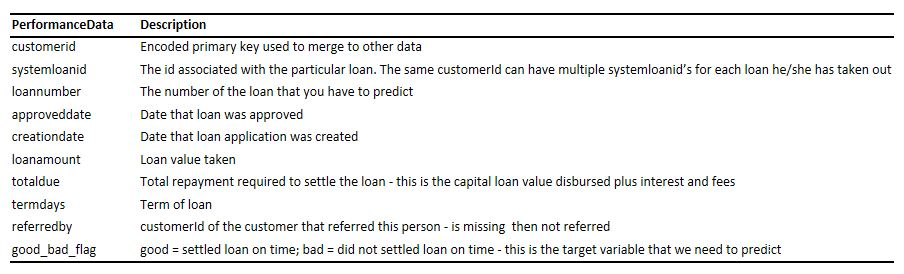

[Customer Previous Loans Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/prev_loans_metadata.JPG)
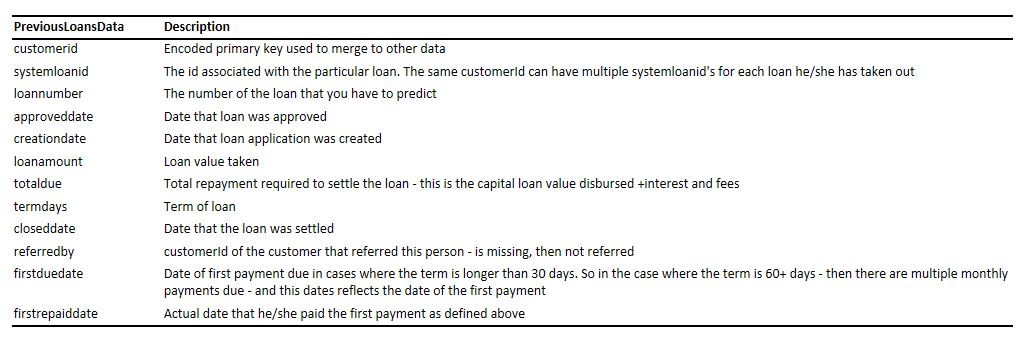

### **Importing Datasets from GitHub**

In [102]:
demo = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/traindemographics.csv")
perf = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainperf.csv")
prev_loans = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainprevloans.csv")

### **Copying Datasets to another dataframe to avoid making changes to the original datasets**

In [103]:
cust_demo = demo.copy()
cust_perf = perf.copy()
cust_prev_loans = prev_loans.copy()

### **Viewing the Datasets**

In [104]:
cust_demo.head()      # checking the first five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [105]:
cust_demo.tail()      # checking the last five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [106]:
cust_perf.head()      # checking the first five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [107]:
cust_perf.tail()      # checking the last five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [108]:
cust_prev_loans.head()      # checking the first five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [109]:
cust_prev_loans.tail()       # checking the last five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


#### For this project, we will consider eliminating unwanted variables, then merge the datasets for easy exploratory data analysis.

In [110]:
print("cust_demo: ", cust_demo.shape)

cust_demo:  (4346, 9)


In [111]:
cust_demo.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [112]:
# dropping unwanted variables in the customer demographic data
cust_demo.drop("bank_branch_clients", axis=1, inplace=True)

- `bank_branch_clients` removed due to too many missing values.

In [114]:
cust_demo.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [115]:
print("cust_perf: ", cust_perf.shape)

cust_perf:  (4368, 10)


In [116]:
cust_perf.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [117]:
# dropping unwanted variables in the customer performance data
cust_perf.drop(columns=["systemloanid","loannumber","referredby"], axis=1, inplace=True)

In [118]:
cust_perf.isnull().sum()

customerid       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
good_bad_flag    0
dtype: int64

In [119]:
print("cust_prev_loans: ", cust_prev_loans.shape)

cust_prev_loans:  (18183, 12)


In [120]:
cust_prev_loans.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [121]:
# dropping unwanted variables in the customer performance data
cust_prev_loans.drop(columns=["systemloanid","loannumber","referredby"], axis=1, inplace=True)

### **Deductions:**
- As much as "referredby" seems to be a potential feature for prediction, but due to the high level of missiong values in both DataFrames. Therefore, we drop "referredby". 

In [122]:
cust_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   approveddate     18183 non-null  object 
 2   creationdate     18183 non-null  object 
 3   loanamount       18183 non-null  float64
 4   totaldue         18183 non-null  float64
 5   termdays         18183 non-null  int64  
 6   closeddate       18183 non-null  object 
 7   firstduedate     18183 non-null  object 
 8   firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


### **Merging the Datasets**

In [123]:
# first, we merged customer demographic and performance data
df = pd.merge(cust_demo, cust_perf, on="customerid")

In [124]:
df.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      493
level_of_education_clients    2834
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
dtype: int64

In [125]:
print("df: ", df.shape)

df:  (3277, 14)


In [126]:
# next, we merged the resulting dataset above with the customer previous loans data
dfnew = pd.merge(df, cust_prev_loans, on="customerid")

In [127]:
dfnew.isnull().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
employment_status_clients      1363
level_of_education_clients    10229
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
good_bad_flag                     0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
dtype: int64

In [128]:
print("dfnew: ", dfnew.shape)

dfnew:  (13693, 22)


### **Copying Merged Dataset to another dataframe to avoid making changes to the original merged dataset**

In [129]:
# copying merged data to avoid manipulating the original data
merged_data = df.copy()

- After considering the data dictionary and the purpose of this project, we shall focus on using the client demographic data and the client performance data only.

### **EXPLORATORY DATA ANALYSIS - Understanding the Data**

### **Checking the first five rows of the data**

In [130]:
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,NaN,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,Good
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,NaN,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15,Good
4,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,Permanent,NaN,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0,24500.0,30,Good


### **Checking the last five rows of the data**

In [131]:
merged_data.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
3272,8a858f735b437619015b437bf3d30bdc,1982-10-19 00:00:00.000000,Savings,3.306874,6.669184,GT Bank,Permanent,NaN,2017-07-14 22:08:22.000000,2017-07-14 21:07:13.000000,10000.0,11500.0,15,Bad
3273,8a858fc45c5f93be015c61e0e5e55e38,1986-02-16 00:00:00.000000,Savings,3.353483,6.651007,GT Bank,NaN,NaN,2017-07-17 08:52:06.000000,2017-07-17 07:52:00.000000,10000.0,11500.0,15,Good
3274,8a85897353d85af80153d8a368020159,1983-06-07 00:00:00.000000,Other,7.046360,5.499944,UBA,Self-Employed,NaN,2017-07-10 18:04:26.000000,2017-07-10 17:04:21.000000,40000.0,44000.0,30,Good
3275,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,2017-07-22 16:07:16.000000,2017-07-22 15:07:02.000000,20000.0,24500.0,30,Good
3276,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,2017-07-21 11:41:46.000000,2017-07-21 10:41:37.000000,10000.0,11500.0,15,Good


In [132]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3277 non-null   object 
 1   birthdate                   3277 non-null   object 
 2   bank_account_type           3277 non-null   object 
 3   longitude_gps               3277 non-null   float64
 4   latitude_gps                3277 non-null   float64
 5   bank_name_clients           3277 non-null   object 
 6   employment_status_clients   2784 non-null   object 
 7   level_of_education_clients  443 non-null    object 
 8   approveddate                3277 non-null   object 
 9   creationdate                3277 non-null   object 
 10  loanamount                  3277 non-null   float64
 11  totaldue                    3277 non-null   float64
 12  termdays                    3277 non-null   int64  
 13  good_bad_flag               3277 

### **Deductions**

- There are missing data in columns "employment_status_clients", and "level_of_education_clients".

### **Checking the columns of the data**

In [133]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag'],
      dtype='object')

### **Check the Data Types**

In [134]:
merged_data.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
employment_status_clients      object
level_of_education_clients     object
approveddate                   object
creationdate                   object
loanamount                    float64
totaldue                      float64
termdays                        int64
good_bad_flag                  object
dtype: object

### **Deductions:**

- It will be necessary to convert the data type of some variables during data cleaning, especially the date-related variables and changing the objects to category for space reduction.

### **Summarising the Data**

In [135]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude_gps,3277.0,4.534611,7.916626,-118.247009,3.354984,3.587546,6.478157,151.209290
latitude_gps,3277.0,7.292799,3.268758,-33.868818,6.473645,6.625954,7.429882,71.228069
loanamount,3277.0,17830.332621,10742.059352,10000.000000,10000.000000,10000.000000,20000.000000,60000.000000
totaldue,3277.0,21280.569271,11929.316405,10000.000000,13000.000000,13000.000000,24500.000000,68100.000000
termdays,3277.0,29.258468,11.405342,15.000000,30.000000,30.000000,30.000000,90.000000


### **Deductions:**

- There are no missing values in the columns "longitude_gps" and "latitude_gps".
- The minimum loan amount = ₦10,000
- The maximum loan amount = ₦60,000
- The minimum term days = 15 days
- The maximum term days = 90 days
- The total due = ₦13,000 when loan amount = ₦10,000. While total due = ₦68,100 when loan amount = ₦60,000. This means the higher the loan amount, the lower the charged interest rate. Hmmmmmn...Interesting!

### **Checking the number of unique values in each variable**

In [136]:
merged_data.nunique()

customerid                    3269
birthdate                     2638
bank_account_type                3
longitude_gps                 3135
latitude_gps                  3257
bank_name_clients               18
employment_status_clients        6
level_of_education_clients       4
approveddate                  3265
creationdate                  3266
loanamount                       9
totaldue                        46
termdays                         4
good_bad_flag                    2
dtype: int64

### **Checking the categories of each categorical variable**

In [137]:
merged_data["bank_account_type"].unique()

array(['Savings', 'Other', 'Current'], dtype=object)

In [139]:
merged_data["bank_name_clients"].unique()

array(['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank',
       'EcoBank', 'FCMB', 'Skye Bank', 'UBA', 'Diamond Bank',
       'Zenith Bank', 'First Bank', 'Union Bank', 'Stanbic IBTC',
       'Standard Chartered', 'Heritage Bank', 'Keystone Bank',
       'Unity Bank', 'Wema Bank'], dtype=object)

In [140]:
merged_data["employment_status_clients"].unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [141]:
merged_data["level_of_education_clients"].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [142]:
merged_data["good_bad_flag"].unique()

array(['Good', 'Bad'], dtype=object)

### **EXPLORATORY DATA ANALYSIS - Data Visualisation**

- Important libraries have been imported earlier in this notebook.

- It would be interesting to gain some insights about the data through visualisation.

### **Univariate Analysis**

- Distribution of the Target variable.

Text(0.5, 1.0, "Target Distribution (Client's Repayment Behaviour)")

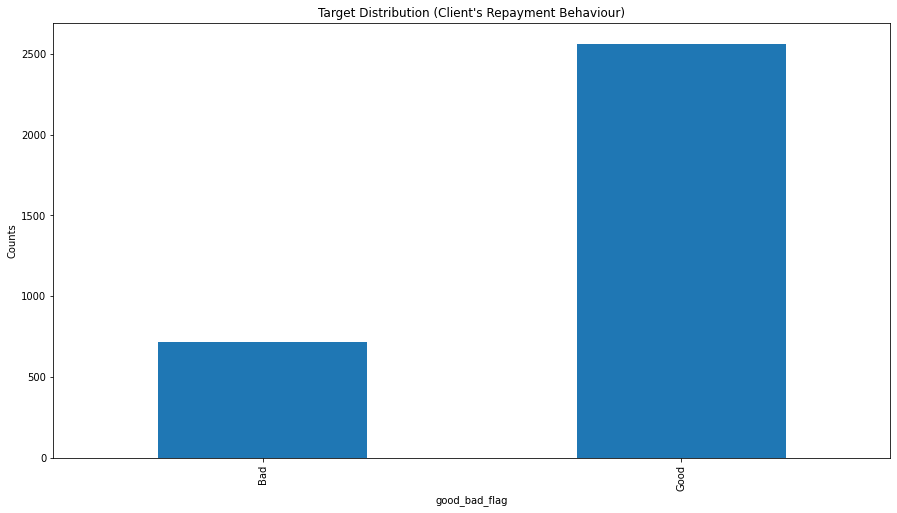

In [143]:
# Plot bar chart
merged_data.pivot_table(columns=['good_bad_flag'],aggfunc='size').plot(kind='bar', figsize = (15,8))    #figsize=(length, height)

# Set axis label and title
plt.xlabel('good_bad_flag')
plt.ylabel('Counts')
plt.title("Target Distribution (Client's Repayment Behaviour)")

In [ ]:
merged_data.groupby(["good_bad_flag"])["good_bad_flag"].count()

good_bad_flag
Bad      714
Good    2563
Name: good_bad_flag, dtype: int64

### **Deductions:**
- Only 22% of the clients did not payback the loan on time.

In [145]:
# getting an age column from the birthdate column
merged_data['year'] = merged_data['birthdate'].apply(lambda x: str(x)[:4])
age = []

for i in merged_data["year"]:
  age.append(2017-int(i))
merged_data["age"]=age

In [146]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3277 non-null   object 
 1   birthdate                   3277 non-null   object 
 2   bank_account_type           3277 non-null   object 
 3   longitude_gps               3277 non-null   float64
 4   latitude_gps                3277 non-null   float64
 5   bank_name_clients           3277 non-null   object 
 6   employment_status_clients   2784 non-null   object 
 7   level_of_education_clients  443 non-null    object 
 8   approveddate                3277 non-null   object 
 9   creationdate                3277 non-null   object 
 10  loanamount                  3277 non-null   float64
 11  totaldue                    3277 non-null   float64
 12  termdays                    3277 non-null   int64  
 13  good_bad_flag               3277 

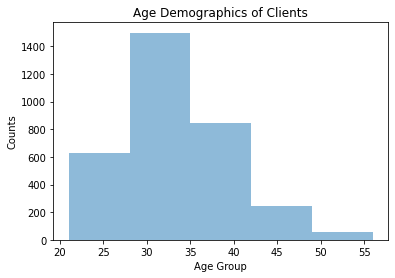

In [147]:
# Plot histogram
plt.hist(merged_data["age"], bins=5, alpha=0.5)

# Set axis labels and title
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title("Age Demographics of Clients")

# Show the plot
plt.show()

### **Deductions:**
- Majority of the bank customers covered in this data are in their late 20s and early 30s.

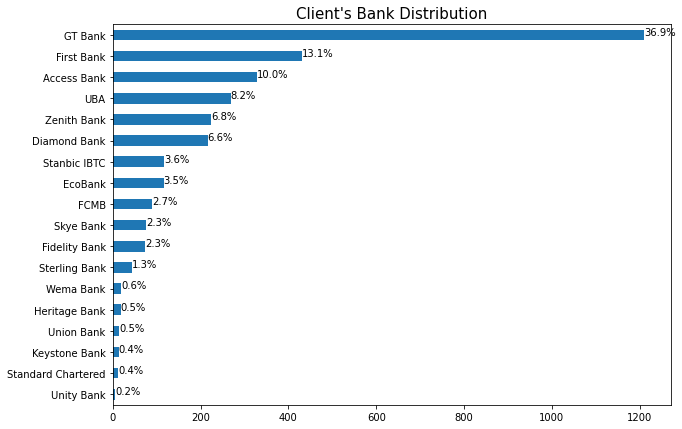

In [148]:
# Plot bar chart for Client's Bank Distribution 
ax = merged_data.bank_name_clients.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title("Client's Bank Distribution", fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/merged_data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

### **Deductions:**
- Majority of the bank clients are from **GT Bank**.
- The top five banks in Nigeria according to this data include: 
  - GT Bank
  - First Bank
  - Access Bank
  - UBA
  - Zenith Bank

In [149]:
import plotly.graph_objects as go

# Example data
labels = merged_data['employment_status_clients'].unique()
values = merged_data['employment_status_clients'].value_counts()

# Creating the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Setting the hover template to show both the label and value
fig.update_traces(hoverinfo='label+value')

# Setting the chart title
fig.update_layout(title='Bank Clients by Employment Status')

# Displaying the chart
fig.show()

### **Deductions:**
- Majority of the clients did not fill out their employment status.
- Among those that filled most of them are permanent staff.

In [150]:
import plotly.graph_objects as go

# Example data
labels = merged_data['level_of_education_clients'].unique()
values = merged_data['level_of_education_clients'].value_counts()

# Creating the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Setting the hover template to show both the label and value
fig.update_traces(hoverinfo='label+value')

# Setting the chart title
fig.update_layout(title='Bank Clients by Level of Education')

# Displaying the chart
fig.show()

### **Deductions:**
- IT'S NO surprise that majority of the bank clients who are interested in loans are Secondary Schhool Certificate holders. This truly reflects the group of the Nigerian populace that uses loan to fix major projects.

In [152]:
import plotly.express as px

fig = px.scatter_geo(merged_data, lat='latitude_gps', lon='longitude_gps', hover_name="bank_name_clients")

# Setting the chart title
fig.update_layout(title='Bank Clients by Location')

# Displaying the chart
fig.show()

### **Bivariate Analysis**

- Let us explore the **Target** Variable Vs. Other Numerical Variables.

In [153]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'year', 'age'],
      dtype='object')

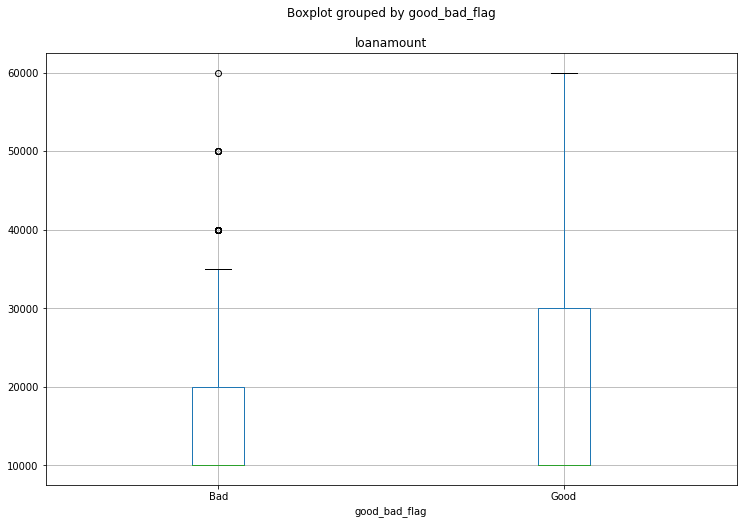

In [154]:
# Looking at the loan amount distribution for good vs bad flag
merged_data.boxplot(by='good_bad_flag', column='loanamount', figsize=(12, 8))
plt.show()

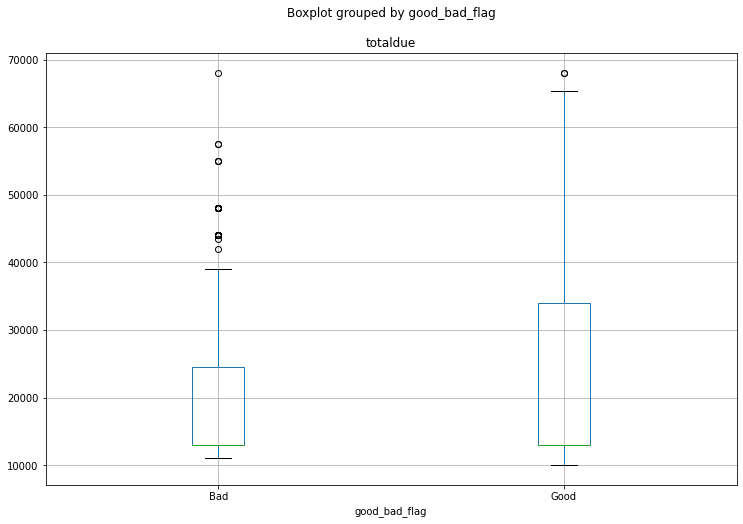

In [155]:
# Looking at the total due distribution for good vs bad flag
merged_data.boxplot(by='good_bad_flag', column='totaldue', figsize=(12, 8))
plt.show()

### **Deductions:**
- Clients with higher totaldue pay lesser interest rate and therefore tends to payback on time.

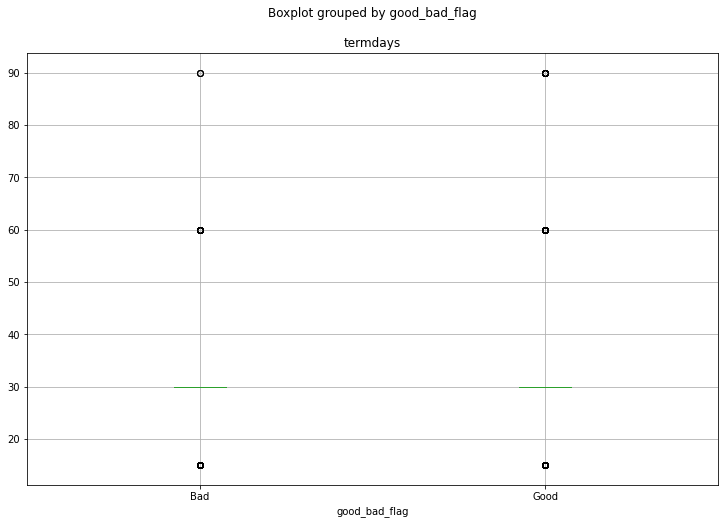

In [156]:
# Looking at the term days distribution for good vs bad flag
merged_data.boxplot(by='good_bad_flag', column='termdays', figsize=(12, 8))
plt.show()

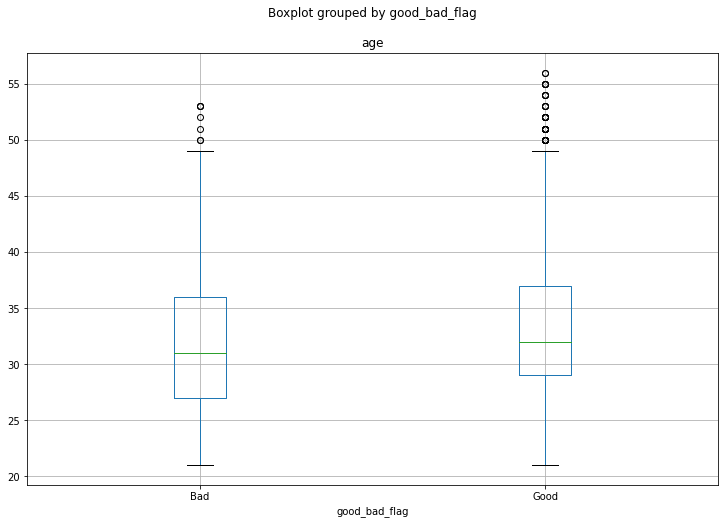

In [157]:
# Looking at the age distribution for good vs bad flag
merged_data.boxplot(by='good_bad_flag', column='age', figsize=(12, 8))
plt.show()

### **Deductions:**
- Clients in lower age-range are more likely to repay loan late.
- The older ones are more likely to pay back loan on time.

### **Bivariate Analysis**

- Examining the Relationship between the Numerical Variables.

In [158]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'year', 'age'],
      dtype='object')

<Axes: >

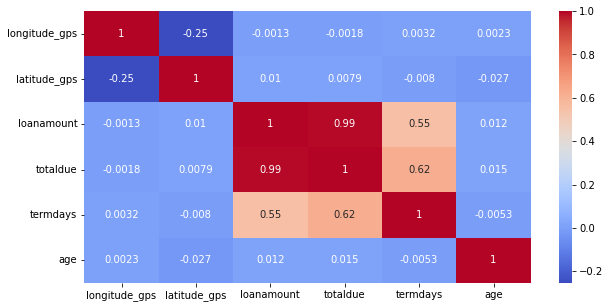

In [159]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')

### **Deductions:**
- A good idea is checking how the charged interest rate correlates with other variables. But, unfortunately, we are unable to obtain that data from the lender, and using an estimated interest rate may not accurately reflect the actual cost of the loan and could result in incorrect calculations.

### **EXPLORATORY DATA ANALYSIS - Data Cleaning**

### **Counting the Number of NAs per column**

In [160]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3277 non-null   object 
 1   birthdate                   3277 non-null   object 
 2   bank_account_type           3277 non-null   object 
 3   longitude_gps               3277 non-null   float64
 4   latitude_gps                3277 non-null   float64
 5   bank_name_clients           3277 non-null   object 
 6   employment_status_clients   2784 non-null   object 
 7   level_of_education_clients  443 non-null    object 
 8   approveddate                3277 non-null   object 
 9   creationdate                3277 non-null   object 
 10  loanamount                  3277 non-null   float64
 11  totaldue                    3277 non-null   float64
 12  termdays                    3277 non-null   int64  
 13  good_bad_flag               3277 

### **Handling Missing Data - Data Imputation**

In [161]:
merged_data.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      493
level_of_education_clients    2834
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
year                             0
age                              0
dtype: int64

In [162]:
merged_data['employment_status_clients'].fillna(merged_data['employment_status_clients'].mode()[0], inplace=True)
merged_data['level_of_education_clients'].fillna(merged_data['level_of_education_clients'].mode()[0], inplace=True)

In [163]:
merged_data.isna().sum() 

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
year                          0
age                           0
dtype: int64

### **Appropriating the Data Types** 

In [164]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  3277 non-null   object 
 1   birthdate                   3277 non-null   object 
 2   bank_account_type           3277 non-null   object 
 3   longitude_gps               3277 non-null   float64
 4   latitude_gps                3277 non-null   float64
 5   bank_name_clients           3277 non-null   object 
 6   employment_status_clients   3277 non-null   object 
 7   level_of_education_clients  3277 non-null   object 
 8   approveddate                3277 non-null   object 
 9   creationdate                3277 non-null   object 
 10  loanamount                  3277 non-null   float64
 11  totaldue                    3277 non-null   float64
 12  termdays                    3277 non-null   int64  
 13  good_bad_flag               3277 

In [165]:
# Change date column to its appriopriate datatype
date_cols = [i for i in merged_data.columns if 'date' in i]

In [166]:
date_cols

['birthdate', 'approveddate', 'creationdate']

In [167]:
for i in date_cols:
  merged_data[i] = pd.to_datetime(merged_data[i])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3277 non-null   object        
 1   birthdate                   3277 non-null   datetime64[ns]
 2   bank_account_type           3277 non-null   object        
 3   longitude_gps               3277 non-null   float64       
 4   latitude_gps                3277 non-null   float64       
 5   bank_name_clients           3277 non-null   object        
 6   employment_status_clients   3277 non-null   object        
 7   level_of_education_clients  3277 non-null   object        
 8   approveddate                3277 non-null   datetime64[ns]
 9   creationdate                3277 non-null   datetime64[ns]
 10  loanamount                  3277 non-null   float64       
 11  totaldue                    3277 non-null   float64     

In [168]:
# converting date-related variables to date time
cat_cols = merged_data.select_dtypes("object")
cat_cols.columns

for i in cat_cols.columns:
  merged_data[i] = merged_data[i].astype("category")

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3277 non-null   category      
 1   birthdate                   3277 non-null   datetime64[ns]
 2   bank_account_type           3277 non-null   category      
 3   longitude_gps               3277 non-null   float64       
 4   latitude_gps                3277 non-null   float64       
 5   bank_name_clients           3277 non-null   category      
 6   employment_status_clients   3277 non-null   category      
 7   level_of_education_clients  3277 non-null   category      
 8   approveddate                3277 non-null   datetime64[ns]
 9   creationdate                3277 non-null   datetime64[ns]
 10  loanamount                  3277 non-null   float64       
 11  totaldue                    3277 non-null   float64     

In [169]:
# counting missing data
merged_data.isna().sum()

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
year                          0
age                           0
dtype: int64

In [170]:
merged_data.shape

(3277, 16)

### **Encoding Categorical Data**

In [171]:
# label_encoder object
label_encoder = LabelEncoder()

# getting categorical variables
catt_cols = merged_data.select_dtypes("category")

# Encode labels in column. 

for i in catt_cols:
  merged_data[i]= label_encoder.fit_transform(merged_data[i])

In [172]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  3277 non-null   int64         
 1   birthdate                   3277 non-null   datetime64[ns]
 2   bank_account_type           3277 non-null   int64         
 3   longitude_gps               3277 non-null   float64       
 4   latitude_gps                3277 non-null   float64       
 5   bank_name_clients           3277 non-null   int64         
 6   employment_status_clients   3277 non-null   int64         
 7   level_of_education_clients  3277 non-null   int64         
 8   approveddate                3277 non-null   datetime64[ns]
 9   creationdate                3277 non-null   datetime64[ns]
 10  loanamount                  3277 non-null   float64       
 11  totaldue                    3277 non-null   float64     

In [173]:
merged_data["bank_account_type"].unique()

array([2, 1, 0])

### **Detecting Outliers**

<Axes: >

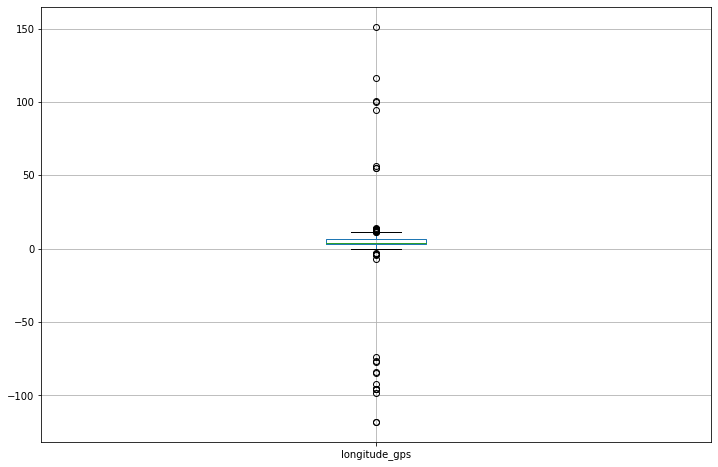

In [174]:
# using boxplot, we investigate the presence of outliers
merged_data.boxplot("longitude_gps",figsize=(12,8))

<Axes: >

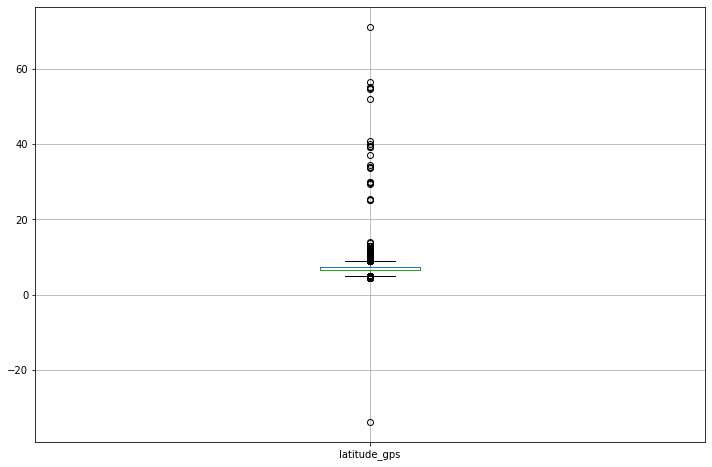

In [175]:
merged_data.boxplot("latitude_gps",figsize=(12,8))

<Axes: >

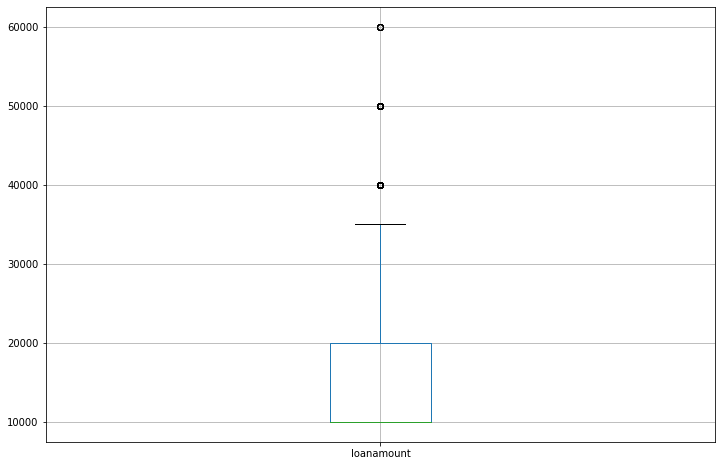

In [177]:
merged_data.boxplot("loanamount",figsize=(12,8))

<Axes: >

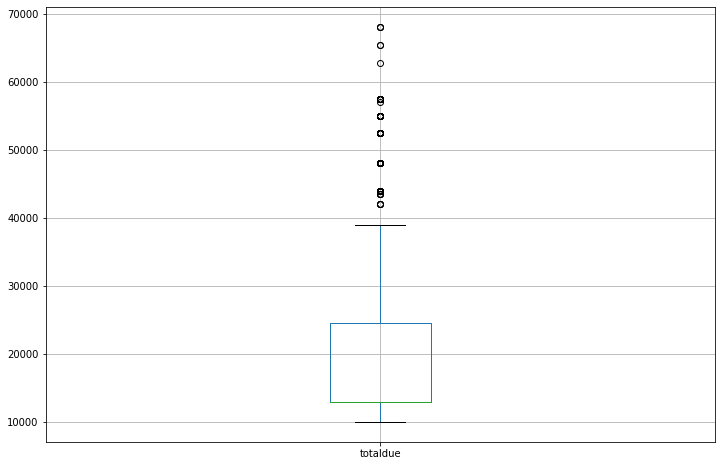

In [178]:
merged_data.boxplot("totaldue",figsize=(12,8))

<Axes: >

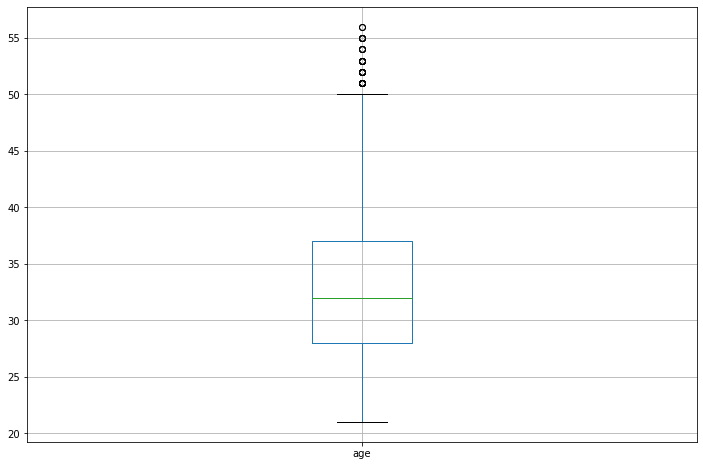

In [179]:
merged_data.boxplot("age",figsize=(12,8))

### **Deductions:**
- There are a number of outliers in the numeric data.
- The outliers will not be treated because they reflect true value in reality.


### **Dropping unwanted variables**

In [180]:
merged_data.drop(columns=["customerid","age","approveddate","year"], axis=1, inplace=True)

In [181]:
# copying the data
new_merged_data = merged_data.copy()

### **MACHINE LEARNING**

### **Data Preparation for Model Building**

**Data Standardisation**
- In the case of longitude and latitude variables, it may be necessary to standardize them since we are using them along with other variables that have significantly different scales. For example, our model will be fed with dataset that includes longitude, latitude, loanamount and totaldue as variables, loanamount and totaldue have a much larger scale than longitude and latitude. In this case, it will be necessary to standardise all numerical variables to ensure that they are on a similar scale.

In [183]:
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   birthdate                   3277 non-null   datetime64[ns]
 1   bank_account_type           3277 non-null   int64         
 2   longitude_gps               3277 non-null   float64       
 3   latitude_gps                3277 non-null   float64       
 4   bank_name_clients           3277 non-null   int64         
 5   employment_status_clients   3277 non-null   int64         
 6   level_of_education_clients  3277 non-null   int64         
 7   creationdate                3277 non-null   datetime64[ns]
 8   loanamount                  3277 non-null   float64       
 9   totaldue                    3277 non-null   float64       
 10  termdays                    3277 non-null   int64         
 11  good_bad_flag               3277 non-null   int64       

In [184]:
# Standardising the numeric columns

num_cols = ["longitude_gps","latitude_gps","loanamount","totaldue"]
scaler = StandardScaler()
new_merged_data[num_cols] = scaler.fit_transform(new_merged_data[num_cols])

NameError: ignored

In [182]:
# Standardizing some variables
s_scaler = preprocessing.StandardScaler()
new_merged_data = s_scaler.fit_transform(new_merged_data)

new_merged_data = pd.DataFrame(new_merged_data, columns=["longitude_gps","latitude_gps","loanamount","totaldue"])

TypeError: ignored

In [ ]:
# Separate train and test data from the combined dataframe
X = new_merged_data.drop(['good_bad_flag'], axis=1)
y = new_merged_data['good_bad_flag']

- It's a good practice to use stratified sampling when dealing with imbalanced datasets, where one class is significantly smaller than the other. This helps to ensure that the model is trained on a representative sample of both classes and can generalize well to new data.
- We do this using the `stratify` parameter in the train_test_split function.

In [ ]:
# Splitting into Train-Test Data 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

1. **X_train:** This is the training data, typically represented as a matrix of input features (or independent variables) that the model will use to learn how to make predictions.

2. **y_train:** This is the corresponding target variable (or dependent variable) for the training data. It's the variable we want the model to predict based on the input features.

3. **X_test:** This is a separate subset of the data used for testing the model's performance. It contains the same type of input features as the training data, but the model has not seen this data before.

4. **y_test:** This is the corresponding target variable for the test data. It's used to evaluate the model's predictions on unseen data.

5. **y_pred:** This is the predicted output variable generated by the model for the test data. The goal is to have y_pred be as close as possible to y_test, indicating that the model has learned to generalise well to new data.

In [ ]:
print(X_test.shape)
print(X_test.columns)

(656, 10)
Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'loanamount', 'totaldue', 'termdays',
       'age'],
      dtype='object')


### **Model Performance**

In [ ]:
# defining a function to compute different metrics to check performance 
def sklearn_classification_model_perf(model, predictors, target):
  """
  Function to compute different metrics to check classification models

  model: classifier
  predictors: independent variables
  target: dependent variable
  """

  # predicting using the independent variables
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred) # computing the accuracy
  recall = recall_score(target, pred) # computing the recall
  precision = precision_score(target, pred) # computing the precision
  f1 = f1_score(target, pred) # computing the f1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1,
      },
      index=[0],
  )

  return df_perf

In [ ]:
def sklearn_confusion_matrix(model, predictors, target):
  """
  To plot the confusion matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """

  y_pred = model.predict(predictors)
  conf_mat = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_mat.flatten().sum())]
          for item in conf_mat.flatten()
      ]
  ).reshape(2, 2)

  plt.figure(figsize=(6,4))
  sns.heatmap(conf_mat, annot=labels, fmt="")
  plt.xlabel("Predicted label")
  plt.ylabel("True label")

### **Model Building**

### **Logistic Regression**

In [ ]:
# Instantiating the model
lRegr = LogisticRegression()

# Fitting the model
lRegr.fit(X_train,y_train)

LogisticRegression()

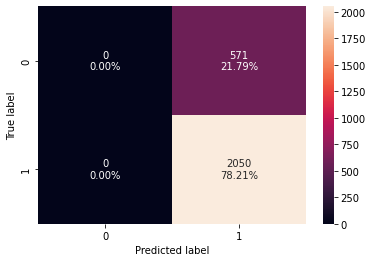

In [ ]:
# Model Training
sklearn_confusion_matrix(lRegr, X_train, y_train)

In [ ]:
lRegr_model_train_perf = sklearn_classification_model_perf(lRegr, X_train, y_train)
print("Model Training Performance: \n", lRegr_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.782144     1.0   0.782144  0.877756


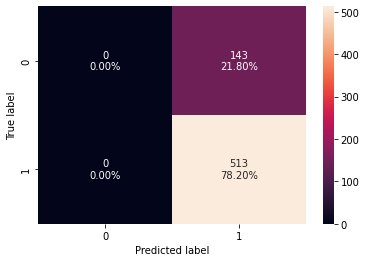

In [ ]:
# Model Testing
sklearn_confusion_matrix(lRegr, X_test, y_test)

In [ ]:
lRegr_model_test_perf = sklearn_classification_model_perf(lRegr, X_test, y_test)
print("Model Testing Performance: \n", lRegr_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.782012     1.0   0.782012  0.877673


### **Decision Tree Classifier**

In [ ]:
# Instantiating the model
dTree = DecisionTreeClassifier(criterion="gini", class_weight={0:0.17,1:0.83}, random_state=42)

# Fitting the model
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=42)

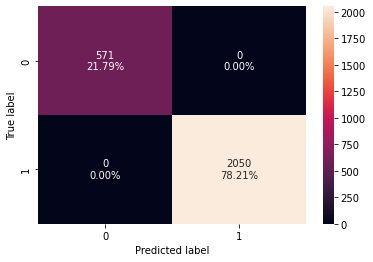

In [ ]:
# Model Training
sklearn_confusion_matrix(dTree, X_train, y_train)

In [ ]:
dTree_model_train_perf = sklearn_classification_model_perf(dTree, X_train, y_train)
print("Model Training Performance: \n", dTree_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


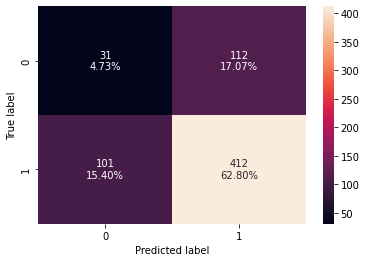

In [ ]:
# Model Testing
sklearn_confusion_matrix(dTree, X_test, y_test)

In [ ]:
dTree_model_test_perf = sklearn_classification_model_perf(dTree, X_test, y_test)
print("Model Testing Performance: \n", dTree_model_test_perf)

Model Testing Performance: 
    Accuracy    Recall  Precision      F1
0  0.675305  0.803119    0.78626  0.7946


- Decision tree is working well on the training data, but is not able to generalize well on the test data based on the recall.

### **Random Forest Classifier**

In [ ]:
# Instantiating the model
rf = RandomForestClassifier(random_state=42)

# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

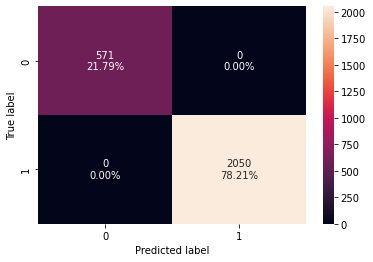

In [ ]:
# Model Training
sklearn_confusion_matrix(rf, X_train, y_train)

In [ ]:
rf_model_train_perf = sklearn_classification_model_perf(rf, X_train, y_train)
print("Model Training Performance: \n", rf_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


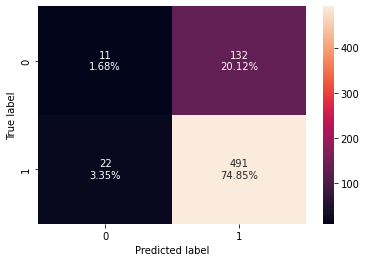

In [ ]:
# Model Testing
sklearn_confusion_matrix(rf, X_test, y_test)

In [ ]:
rf_model_test_perf = sklearn_classification_model_perf(rf, X_test, y_test)
print("Model Testing Performance: \n", rf_model_test_perf)

Model Testing Performance: 
    Accuracy    Recall  Precision        F1
0  0.765244  0.957115   0.788122  0.864437


### **XGBoost Classifier**

In [ ]:
# Instantiating the model
XGB = XGBClassifier(n_estimators=100)

In [ ]:
# Fitting the model
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

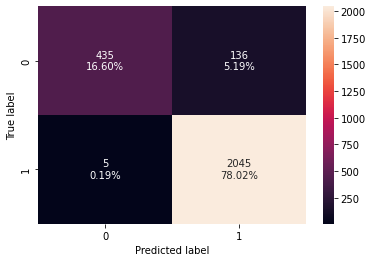

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(XGB, X_train, y_train)

In [ ]:
XGB_model_train_perf = sklearn_classification_model_perf(XGB, X_train, y_train)
print("Model Training Performance: \n", XGB_model_train_perf)

Model Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.946204  0.997561   0.937643  0.966675


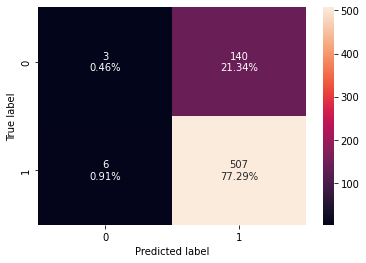

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(XGB, X_test, y_test)

In [ ]:
XGB_model_test_perf = sklearn_classification_model_perf(XGB, X_test, y_test)
print("Model Testing Performance: \n", GNB_model_test_perf)

Model Testing Performance: 
    Accuracy    Recall  Precision        F1
0  0.777439  0.988304   0.783617  0.874138


### **Artificial Neural Network**

In [ ]:
# Instantiating the model

ANNclf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=42)

In [ ]:
# Fitting the model

ANNclf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), random_state=42)

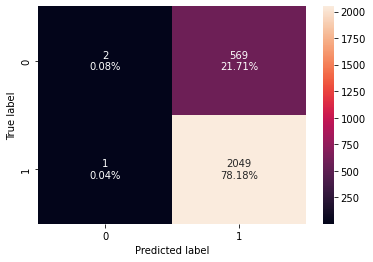

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(ANNclf, X_train, y_train)

In [ ]:
ANNclf_model_train_perf = sklearn_classification_model_perf(ANNclf, X_train, y_train)
print("Model Training Performance: \n", ANNclf_model_train_perf)

Model Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.782526  0.999512   0.782659  0.877892


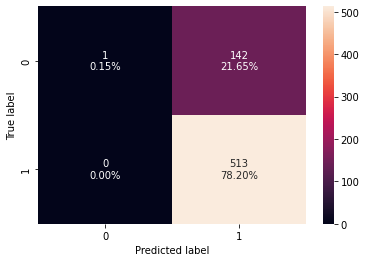

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(ANNclf, X_test, y_test)

In [ ]:
ANNclf_model_test_perf = sklearn_classification_model_perf(ANNclf, X_test, y_test)
print("Model Testing Performance: \n", ANNclf_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.783537     1.0   0.783206  0.878425


### **Hyperparameters Tuning using Grid Search**

### **Tuning Decision Tree Classifier**

In [ ]:
# Choose the type of Classifier
dTree_tuned = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=42)

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(2,30),
              "min_samples_leaf": [1,2,5,7,10],
              "max_leaf_nodes": [2,3,5,10,15],
              "min_impurity_decrease": [0.0001,0.001,0.01,0.1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the Classifier to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=42)

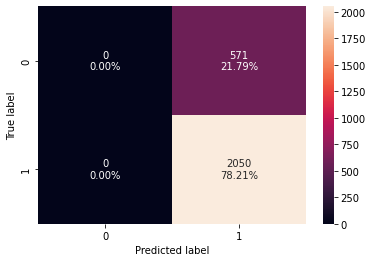

In [ ]:
sklearn_confusion_matrix(dTree_tuned, X_train, y_train)

In [ ]:
dTree_tuned_model_train_perf = sklearn_classification_model_perf(dTree_tuned, X_train, y_train)
print("Model Training Performance: \n", dTree_tuned_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.782144     1.0   0.782144  0.877756


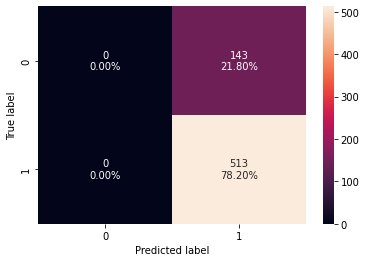

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(dTree_tuned, X_test, y_test)

In [ ]:
dTree_tuned_model_test_perf = sklearn_classification_model_perf(dTree_tuned, X_test, y_test)
print("Model Testing Performance: \n", dTree_tuned_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.782012     1.0   0.782012  0.877673


### **Deductions:**
- The accuracy of the Decision Tree Classifier is stable.

### **Tuning Random Forest**

In [ ]:
# Choose the type of Classifier
rf_tuned = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1,6,1),
    "max_features": [0.7,0.9,"log2","auto"],
    "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the Classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train) 

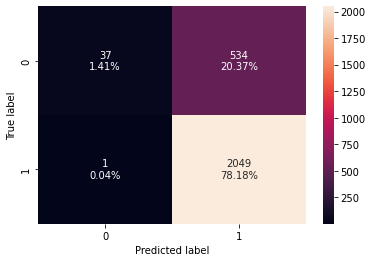

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = sklearn_classification_model_perf(rf_tuned, X_train, y_train)
print("Model Training Performance: \n", rf_tuned_model_train_perf)

Model Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.795879  0.999512   0.793264  0.884524


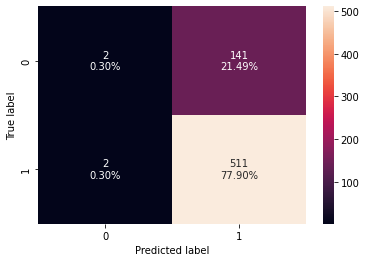

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = sklearn_classification_model_perf(rf_tuned, X_test, y_test)
print("Model Testing Performance: \n", rf_tuned_model_test_perf)

Model Testing Performance: 
    Accuracy    Recall  Precision        F1
0  0.782012  0.996101   0.783742  0.877253


### **Tuning Logistic Regression**

In [ ]:
# Choose the type of Classifier
lRegr_tuned = LogisticRegression()

# Grid of parameters to choose from
parameters = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [100, 1000,2500, 5000]
    }
]

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(lRegr_tuned, param_grid=parameters, n_jobs=-1, cv=3, verbose=True)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the Classifier to the best combination of parameters
lRegr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
lRegr_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

LogisticRegression(C=0.0006951927961775605, solver='newton-cg')

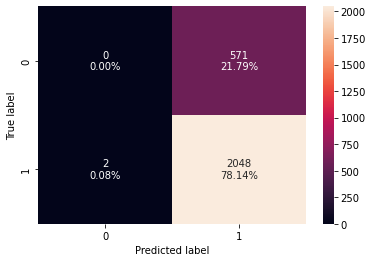

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(lRegr_tuned, X_train, y_train)

In [ ]:
lRegr_tuned_model_train_perf = sklearn_classification_model_perf(lRegr_tuned, X_train, y_train)
print("Model Training Performance: \n", lRegr_tuned_model_train_perf)

Model Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.781381  0.999024   0.781978  0.877276


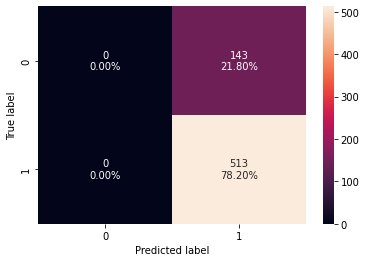

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(lRegr_tuned, X_test, y_test)

In [ ]:
lRegr_tuned_model_test_perf = sklearn_classification_model_perf(lRegr_tuned, X_test, y_test)
print("Model Testing Performance: \n", lRegr_tuned_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.782012     1.0   0.782012  0.877673


### **Tuning ANN (MLP Classifier)**

In [ ]:
# Choose the type of Classifier
MLP_tuned = MLPClassifier()

# Grid of parameters to choose from
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]
}


# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(MLP_tuned, param_grid=parameters, n_jobs=-1)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the Classifier to the best combination of parameters
MLP_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
MLP_tuned.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0,
              solver='lbfgs')

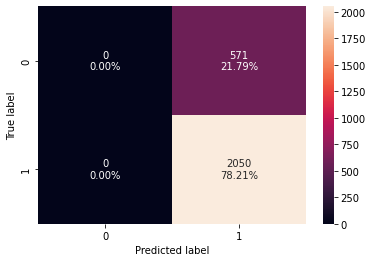

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(MLP_tuned, X_train, y_train)

In [ ]:
MLP_tuned_model_train_perf = sklearn_classification_model_perf(MLP_tuned, X_train, y_train)
print("Model Training Performance: \n", MLP_tuned_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.782144     1.0   0.782144  0.877756


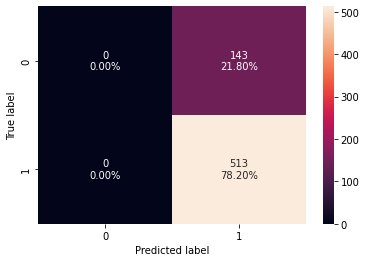

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(MLP_tuned, X_test, y_test)

In [ ]:
MLP_tuned_model_test_perf = sklearn_classification_model_perf(MLP_tuned, X_test, y_test)
print("Model Testing Performance: \n", MLP_tuned_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.782012     1.0   0.782012  0.877673


In [ ]:
X_train.shape

(2621, 10)

### **Tuning XGBoost Classifier**

In [ ]:
# Choose the type of Classifier
XGB_tuned = XGBClassifier()

# Grid of parameters to choose from
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

# Run the grid search
grid_obj = GridSearchCV(XGB_tuned,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)
grid_obj= grid_obj.fit(X_train, y_train)

# Set the Classifier to the best combination of parameters
XGB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
XGB_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

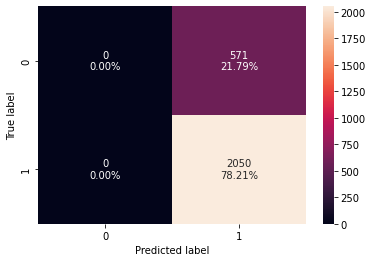

In [ ]:
# Model Training Confusion Matrix
sklearn_confusion_matrix(XGB_tuned, X_train, y_train)

In [ ]:
XGB_tuned_model_train_perf = sklearn_classification_model_perf(XGB_tuned, X_train, y_train)
print("Model Training Performance: \n", XGB_tuned_model_train_perf)

Model Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.782144     1.0   0.782144  0.877756


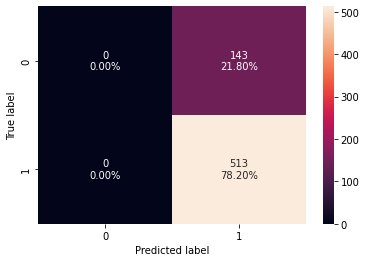

In [ ]:
# Model Testing Confusion Matrix
sklearn_confusion_matrix(XGB_tuned, X_test, y_test)

In [ ]:
XGB_tuned_model_test_perf = sklearn_classification_model_perf(XGB_tuned, X_test, y_test)
print("Model Testing Performance: \n", XGB_tuned_model_test_perf)

Model Testing Performance: 
    Accuracy  Recall  Precision        F1
0  0.782012     1.0   0.782012  0.877673


### **Comparing the Models**

- It is important to compare the performance of each model carefully and consider the next step if necessary.

In [ ]:
# Training Performance Comparison

models_train_comp_data = pd.concat(
    [lRegr_model_train_perf.T,dTree_model_train_perf.T,
     rf_model_train_perf.T,XGB_model_train_perf.T,
     ANNclf_model_train_perf.T,lRegr_tuned_model_train_perf.T,
     dTree_tuned_model_train_perf.T,rf_tuned_model_train_perf.T,
     XGB_tuned_model_train_perf.T,MLP_tuned_model_train_perf.T], axis=1,
)

models_train_comp_data.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Randon Forest",
    "XGBoost",
    "ANN Classifier",
    "Tuned Logistic Regression",
    "Tuned Decision Tree",
    "Tuned Randon Forest",
    "Tuned XGBoost",
    "Tuned ANN Classifier"
]

print("Training Performance Comparison")
models_train_comp_data

Training Performance Comparison


,Logistic Regression,Decision Tree,Randon Forest,XGBoost,ANN Classifier,Tuned Logistic Regression,Tuned Decision Tree,Tuned Randon Forest,Tuned XGBoost,Tuned ANN Classifier
Accuracy,0.782144,1.0,1.0,0.946204,0.782526,0.781381,0.782144,0.795879,0.782144,0.782144
Recall,1.000000,1.0,1.0,0.997561,0.999512,0.999024,1.000000,0.999512,1.000000,1.000000
Precision,0.782144,1.0,1.0,0.937643,0.782659,0.781978,0.782144,0.793264,0.782144,0.782144
F1,0.877756,1.0,1.0,0.966675,0.877892,0.877276,0.877756,0.884524,0.877756,0.877756


In [ ]:
# Testing Performance Comparison

models_test_comp_data = pd.concat(
    [lRegr_model_test_perf.T,dTree_model_test_perf.T,
     rf_model_test_perf.T, XGB_model_test_perf.T,
     ANNclf_model_test_perf.T,lRegr_tuned_model_test_perf.T,
     dTree_tuned_model_test_perf.T,rf_tuned_model_test_perf.T,
     XGB_tuned_model_test_perf.T,MLP_tuned_model_test_perf.T], axis=1,
)

models_test_comp_data.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Randon Forest",
    "XGBoost",
    "ANN Classifier",
    "Tuned Logistic Regression",
    "Tuned Decision Tree",
    "Tuned Randon Forest", 
    "Tuned XGBoost",
    "Tuned ANN Classifier"
]

print("Testing Performance Comparison")
models_test_comp_data

Testing Performance Comparison


,Logistic Regression,Decision Tree,Randon Forest,XGBoost,ANN Classifier,Tuned Logistic Regression,Tuned Decision Tree,Tuned Randon Forest,Tuned XGBoost,Tuned ANN Classifier
Accuracy,0.782012,0.675305,0.765244,0.753049,0.783537,0.782012,0.782012,0.782012,0.782012,0.782012
Recall,1.000000,0.803119,0.957115,0.935673,1.000000,1.000000,1.000000,0.996101,1.000000,1.000000
Precision,0.782012,0.786260,0.788122,0.788177,0.783206,0.782012,0.782012,0.783742,0.782012,0.782012
F1,0.877673,0.794600,0.864437,0.855615,0.878425,0.877673,0.877673,0.877253,0.877673,0.877673


### **Deductions:**
- XGBoost performed well with default parameters on the training dataset, but for test data, Tuned XGBoost performed better. 
- It's possible that there are even more optimal parameters that could lead to improved performance.

### **Feature Evaluation of Tuned XGBoost for Feature Explainability**

In [ ]:
# feature evaluation

feat_importances = pd.DataFrame(XGB_tuned.feature_importances_, columns=["Imp"], index=X.columns).sort_values(by ="Imp", ascending=False)
print(feat_importances) 
#feat_importances.nlargest(10).plot(kind='barh')

                                 Imp
loanamount                  0.566046
age                         0.213878
latitude_gps                0.094521
bank_account_type           0.068529
longitude_gps               0.057026
bank_name_clients           0.000000
employment_status_clients   0.000000
level_of_education_clients  0.000000
totaldue                    0.000000
termdays                    0.000000


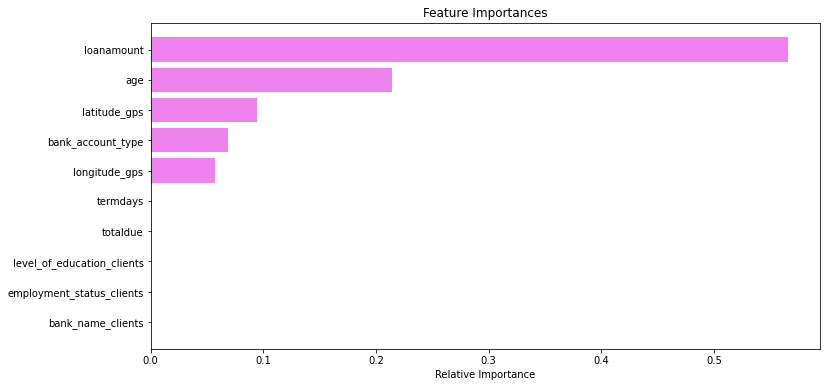

In [ ]:
feat_names = X_train.columns
importances = XGB_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### **Deductions:**
- Loan amount is the most important feature for prediction, followed by age, location and bank account type.

### **Business Insights and Recommendations**

### **Saving Model for Deployment**

In [ ]:
XGB_tuned.save_model('xgb_model.json')

**Model Deployment using Streamlit**
- When predicting using Streamlit, we are required to provide all the variables that were used during model training. This is because the model is trained on a specific set of features, and it requires the same features to make accurate predictions.

- Providing a different set of variables than those used during model training may not be able to make accurate predictions. This is because the model has learned the relationship between the input variables and the output during training, and if the input variables are different during predictions, the model's learned relationship may not be applicable.

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, fit_model.predict(X_test), alpha=0.3)
plt.show()

NameError: ignored

### **Prediction with the test data for Submission at Zindi**

In [ ]:
def automated_pipeline(dfr1,dfr2,dfr3,model):
# Merging Dataset
  merged_test_data=pd.merge(dfr1, dfr2, on='customerid')
  final_test_merged_data=pd.merge(merged_test_data, dfr3, on='customerid')

# Change date column to its appriopriate datatype
  date_cols = [i for i in final_test_merged_data.columns if 'date' in i]
  date_cols

  for i in date_cols:
    final_test_merged_data[i] = pd.to_datetime(final_test_merged_data[i])

  final_test_merged_data.info()

# Converting the variables to the appropriate data types
  cat_cols = final_test_merged_data.select_dtypes("object")
  cat_cols.columns

  for i in cat_cols.columns:
    final_test_merged_data[i] = final_test_merged_data[i].astype("category")

# Dropping unwanted variables
  final_test_merged_data.drop(["customerid", "bank_branch_clients", "referredby_x","referredby_y"], axis=1, inplace=True)

  datte_cols = merged_data_2.select_dtypes("datetime64[ns]")
  datte_cols.columns

  for i in datte_cols.columns:
    merged_data_2[i] = merged_data_2[i].astype("int")

  merged_data_2.info()

  # # Dealing with missing data
  # final_test_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)
  # final_test_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
  # final_test_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
  # print(" The number of null datapoint are :", final_test_merged_data.isna().sum() )

  # label_encoder object
  label_encoder =LabelEncoder()

# getting categorical variables
  catt_cols = final_test_merged_data.select_dtypes("category")

# Encode labels in column. 

for i in catt_cols:
  final_test_merged_data[i]= label_encoder.fit_transform(final_test_merged_data[i])


  #Predicting Using ML 
  y_pred = fit_model.predict(final_test_merged_data)
  print(y_pred)
  merged_test_data["Good_Bad_flag"]=y_pred
  results = merged_test_data[["customerid", "Good_Bad_flag"]]
  results.to_csv("Submission.csv", index=False)
  print(results.head(5))


In [ ]:
test_demo=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testdemographics.csv")
test_perf=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testperf.csv")
test_prev_loans=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testprevloans.csv")

auto_pipeline(test_demo,test_perf,test_prev_loans,fit_model)

# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='accuracy').mean())

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.8152610441767069
Training Data F1 Score  0.8982300884955753
Validation Mean F1 Score:  0.44916020888826613
Validation Mean Accuracy:  0.815409906445838
Test Accuracy:  0.8152610441767069
Test F1 Score:  0.8982300884955753
Confusion Matrix on Test Data


Predicted,1,All
Actual,,
0,506,506
1,2233,2233
All,2739,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.82      1.00      0.90      2233

    accuracy                           0.82      2739
   macro avg       0.41      0.50      0.45      2739
weighted avg       0.66      0.82      0.73      2739



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9594742606790799
Training Data F1 Score  0.9751288371050862
Validation Mean F1 Score:  0.9130047305754747
Validation Mean Accuracy:  0.9479638787984885
Test Accuracy:  0.9594742606790799
Test F1 Score:  0.9751288371050862
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,452,54,506
1,57,2176,2233
All,509,2230,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       506
           1       0.98      0.97      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.93      0.93      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Random Forests

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))


print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9623950346841913
Training Data F1 Score  0.9773177714159876
Validation Mean F1 Score:  0.9139629936392654
Validation Mean Accuracy:  0.9493330332264203
Test Accuracy:  0.9623950346841913
Test F1 Score:  0.9773177714159876
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,417,89,506
1,14,2219,2233
All,431,2308,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       506
           1       0.96      0.99      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.96      0.91      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Artificial Neural Networks

In [ ]:
Ann_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
Ann_clf.fit(X_train, y_train)
y_pred = Ann_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.6871120847024461
Training Data F1 Score  0.8056248582444998
Validation Mean F1 Score:  0.9125681890854824
Validation Mean Accuracy:  0.9463205433602389
Test Accuracy:  0.6871120847024461
Test F1 Score:  0.8056248582444998
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,106,400,506
1,457,1776,2233
All,563,2176,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.21      0.20       506
           1       0.82      0.80      0.81      2233

    accuracy                           0.69      2739
   macro avg       0.50      0.50      0.50      2739
weighted avg       0.70      0.69      0.69      2739



# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.69258853596203
Training Data F1 Score  0.8029026217228464
Validation Mean F1 Score:  0.9143689561461423
Validation Mean Accuracy:  0.9482376013121341
Test Accuracy:  0.69258853596203
Test F1 Score:  0.8029026217228464
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,182,324,506
1,518,1715,2233
All,700,2039,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.36      0.30       506
           1       0.84      0.77      0.80      2233

    accuracy                           0.69      2739
   macro avg       0.55      0.56      0.55      2739
weighted avg       0.73      0.69      0.71      2739



### **Saving the promising model**

### Trying out XGBoost Classifier.



In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Print model accuracy
print("Accuracy: ", round(xgb_model.score(X_test, y_test), 4))


Accuracy:  0.9617


In [ ]:
xgb_model.save_model("loan_model.json")